# Gráficos para el Cartel

In [165]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
custom_palette = ["#e7b1c2ff", "#dd92aaff", "#ba3b63ff", "#73243dff", "#100508ff"]
CIMATred = sns.color_palette(custom_palette)
CIMATred

[(0.9058823529411765, 0.6941176470588235, 0.7607843137254902),
 (0.8666666666666667, 0.5725490196078431, 0.6666666666666666),
 (0.7294117647058823, 0.23137254901960785, 0.38823529411764707),
 (0.45098039215686275, 0.1411764705882353, 0.23921568627450981),
 (0.06274509803921569, 0.0196078431372549, 0.03137254901960784)]

In [167]:
base_path = "../../data/processed/definitive-three-classes/"

threeclass_train = pd.read_csv(base_path + "train.csv")
threeclass_test = pd.read_csv(base_path + "test.csv")
threeclass_real = pd.read_csv(base_path + "real.csv", dtype = {'FAM_Sample_info_id': str, 'VIC_Sample_info_id': str})

threeclass_train["set"] = "Entrenamiento"
threeclass_test["set"] = "Prueba"
threeclass_real["set"] = "Real"

In [168]:
base_path = "../../data/processed/definitive-two-classes/"

twoclass_train = pd.read_csv(base_path + "train.csv")
twoclass_test = pd.read_csv(base_path + "test.csv")
twoclass_real = pd.read_csv(base_path + "real.csv", dtype = {'FAM_Sample_info_id': str, 'VIC_Sample_info_id': str})

twoclass_train["set"] = "Entrenamiento"
twoclass_test["set"] = "Prueba"
twoclass_real["set"] = "Real"

In [169]:
db = pd.concat([twoclass_train, twoclass_test], ignore_index = True)[["True_positive", "set"]].groupby(["True_positive", "set"]).size().reset_index(name = "Count")
db.columns = ["Clasificación", "Conjunto", "Cantidad"]
db.sort_values("Conjunto", inplace = True)
db['Clasificación'].replace({0: 'NO Paternidad', 1: 'Paternidad'}, inplace=True)
db

,Clasificación,Conjunto,Cantidad
0,NO Paternidad,Entrenamiento,660
2,Paternidad,Entrenamiento,660
1,NO Paternidad,Prueba,480
3,Paternidad,Prueba,90


(0.0, 700.0)

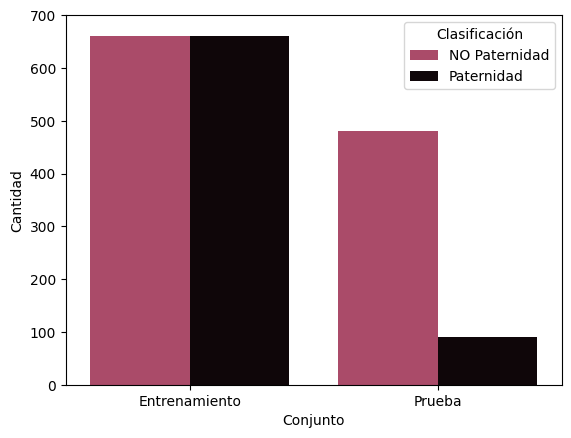

In [176]:
sns.barplot(db, x="Conjunto", y="Cantidad", hue = "Clasificación", palette = [CIMATred[-3], CIMATred[-1]])
plt.ylim(0, 700) # Set y-axis limits

In [171]:
db_three = pd.concat([threeclass_train, threeclass_test], ignore_index = True)[["True_positive", "set"]].groupby(["True_positive", "set"]).size().reset_index(name = "Count")
db_three.columns = ["Clasificación", "Conjunto", "Cantidad"]
db_three.sort_values("Conjunto", inplace = True)
db_three['Clasificación'].replace({0: 'NO Paternidad', 1: 'Indeterminado', 2: 'Paternidad'}, inplace=True)
db_three

,Clasificación,Conjunto,Cantidad
0,NO Paternidad,Entrenamiento,528
2,Indeterminado,Entrenamiento,491
4,Paternidad,Entrenamiento,301
1,NO Paternidad,Prueba,383
3,Indeterminado,Prueba,147
5,Paternidad,Prueba,40


(0.0, 700.0)

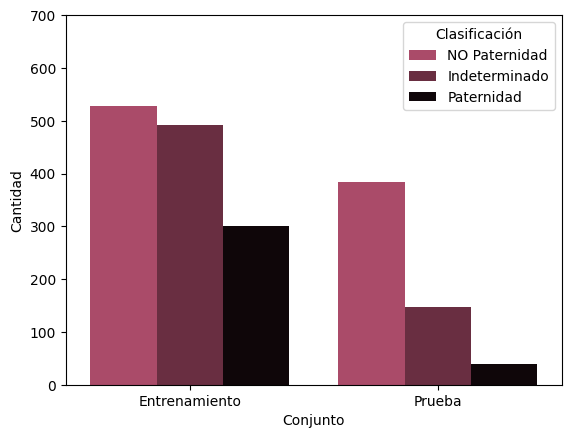

In [172]:
sns.barplot(db_three, x="Conjunto", y="Cantidad", hue = "Clasificación", palette = CIMATred[-3:])
plt.ylim(0, 700) # Set y-axis limits

# Distribución de los Datos en el Espacio de Características

In [177]:
db = pd.concat([threeclass_train, threeclass_test, threeclass_real])

In [178]:
import plotly.express as px

fig = px.scatter_3d(db, x='k1', y='k2', z='ValueLog10',
              color='True_positive')
fig.update_traces(marker_size = 5)
fig.show()